# ROMY Barometer - Statistic Plots

In [1]:
import os
import obspy as obs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from obspy import read_inventory

from andbro__read_sds import __read_sds

In [2]:
from functions.get_mean_promy_pressure import __get_mean_promy_pressure
from functions.get_mean_rmy_pressure import __get_mean_rmy_pressure

In [3]:
#%matplotlib tk

In [4]:
if os.uname().nodename == 'lighthouse':
    root_path = '/home/andbro/'
    data_path = '/home/andbro/kilauea-data/'
    archive_path = '/home/andbro/freenas/'
    bay_path = '/home/andbro/bay200/'
elif os.uname().nodename == 'kilauea':
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'
    bay_path = '/bay200/'
elif os.uname().nodename in ['lin-ffb-01', 'ambrym', 'hochfelln']:
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'
    bay_path = '/bay200/'

## Configurations

In [5]:
config = {}

# output path for figures
config['path_to_figs'] = data_path+"romy_baro/figures/"

# path to data archive
config['path_to_data'] = data_path+"romy_baro/data/"



## Load Data

In [6]:
df = pd.read_pickle(config['path_to_data']+"RB_statistics.pkl")

In [7]:
df = df[df.status == False]

In [8]:
df.keys()

Index(['t1', 't2', 'status', 'shift_PP_N', 'shift_PP_E', 'shift_HP_N',
       'shift_HP_E', 'cmax_PP_N', 'cmax_PP_E', 'cmax_HP_N', 'cmax_HP_E', 'r_z',
       'r_n', 'r_e', 'a_z', 'a_n', 'a_e', 'b_z', 'b_n', 'b_e'],
      dtype='object')

In [9]:
for k in ["shift_PP_N", "shift_PP_E", "shift_HP_N", "shift_HP_E"]:
    df[k] = df[k]/20 # 20 Hz sampling rate


In [10]:
df = df[df.b_e != 0]

In [11]:
df

,t1,t2,status,shift_PP_N,shift_PP_E,shift_HP_N,shift_HP_E,cmax_PP_N,cmax_PP_E,cmax_HP_N,cmax_HP_E,r_z,r_n,r_e,a_z,a_n,a_e,b_z,b_n,b_e
1,2024-04-20T02:00:00.000000Z,2024-04-20T05:00:00.000000Z,False,-18.70,-21.85,-2.30,-2.75,-0.523632,0.556844,-0.503033,0.617003,13.41,22.95,37.32,2.348783e-10,2.388746e-10,-4.750663e-10,-2.104374e-10,-1.512435e-09,9.378284e-10
2,2024-04-20T04:00:00.000000Z,2024-04-20T07:00:00.000000Z,False,13.85,216.45,1.20,234.30,-0.507900,-0.466901,0.549269,-0.505150,13.85,28.48,15.81,-8.101145e-10,6.746761e-11,7.839609e-11,3.039246e-09,1.937761e-09,-2.141780e-09
3,2024-04-20T06:00:00.000000Z,2024-04-20T09:00:00.000000Z,False,-211.10,-23.75,-34.25,-36.30,0.298569,-0.419158,-0.301986,0.430946,14.46,5.35,6.92,-1.685316e-09,1.581034e-10,4.271367e-10,2.373188e-09,8.230512e-10,-1.190180e-09
4,2024-04-20T08:00:00.000000Z,2024-04-20T11:00:00.000000Z,False,-11.65,-173.75,1.90,2.30,0.493583,0.408832,0.600588,-0.461417,7.75,36.67,18.63,-2.770947e-10,5.333925e-10,-2.458769e-10,1.020033e-09,1.221800e-09,-1.166897e-09
5,2024-04-20T10:00:00.000000Z,2024-04-20T13:00:00.000000Z,False,12.70,282.55,1.40,266.60,-0.421237,0.397080,0.540224,-0.412654,30.18,26.44,8.17,-1.401358e-09,7.109994e-11,3.327314e-10,4.783868e-11,8.962240e-10,-3.529778e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,2024-05-12T10:00:00.000000Z,2024-05-12T13:00:00.000000Z,False,-11.15,-12.60,-0.60,-1.25,-0.350333,0.408628,-0.504098,0.453663,4.34,25.08,19.65,-2.437478e-10,1.147016e-10,4.697208e-12,-1.117166e-09,-3.029645e-09,3.298222e-09
270,2024-05-12T12:00:00.000000Z,2024-05-12T15:00:00.000000Z,False,22.80,19.65,9.90,33.25,0.503118,-0.511735,-0.462336,-0.460494,8.55,15.59,16.40,7.354768e-10,-6.045462e-09,1.757574e-09,-1.535439e-09,-6.451852e-09,5.145451e-09
283,2024-05-13T14:00:00.000000Z,2024-05-13T17:00:00.000000Z,False,237.15,237.00,218.90,218.85,-0.453514,0.454385,0.465788,-0.470558,3.77,10.84,8.28,-1.299465e-09,3.094864e-09,-1.099081e-09,-4.087190e-10,-1.240497e-08,6.954565e-09
284,2024-05-13T16:00:00.000000Z,2024-05-13T19:00:00.000000Z,False,-271.80,-222.85,-289.30,-289.70,0.450945,0.519023,-0.506075,0.552728,4.07,0.82,3.59,-1.102554e-09,-5.484462e-10,6.913658e-10,1.314332e-09,-4.116196e-10,-1.632000e-09


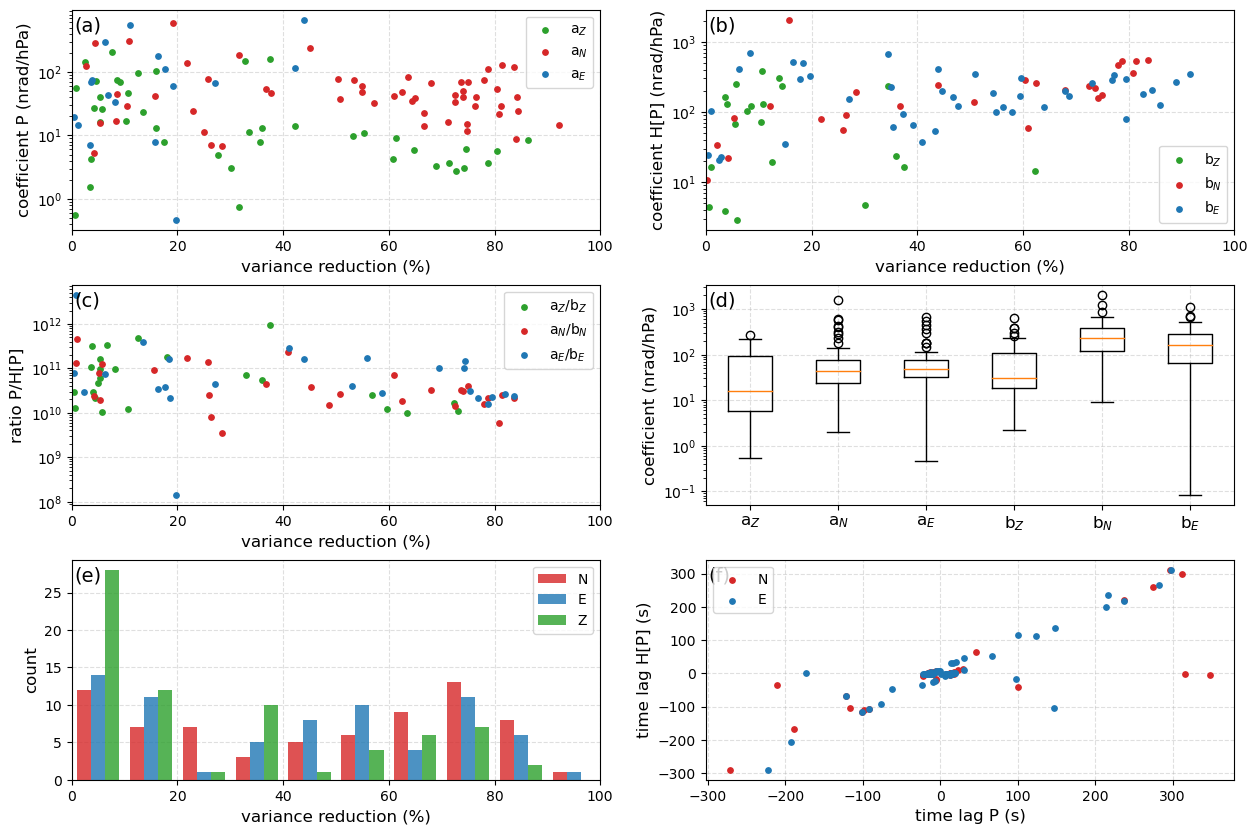

In [21]:
def __makeplot():

    import matplotlib.pyplot as plt
    from matplotlib.gridspec import GridSpec

    colors = {"Z":"tab:green", "N":"tab:red", "E":"tab:blue"}

    Nrow, Ncol = 3, 2

    font = 12

    scale, unit = 1e11, "nrad/hPa"

    hil = r"H[P]"

    fig = plt.figure(figsize=(15, 10))

    gs = GridSpec(Nrow, Ncol, figure=fig, hspace=0.25)

    ax0 = fig.add_subplot(gs[0, 0])
    ax1 = fig.add_subplot(gs[0, 1])
    ax2 = fig.add_subplot(gs[1, 0])
    ax3 = fig.add_subplot(gs[1, 1])
    ax4 = fig.add_subplot(gs[2, 0])
    ax5 = fig.add_subplot(gs[2, 1])

    # ___________________________________________________
    ax0.scatter(df.r_z, df.a_z*scale, s=15, color=colors["Z"], label=r"a$_Z$", zorder=2)
    ax0.scatter(df.r_n, df.a_n*scale, s=15, color=colors["N"], label=r"a$_N$", zorder=2)
    ax0.scatter(df.r_e, df.a_e*scale, s=15, color=colors["E"], label=r"a$_E$", zorder=2)
    ax0.legend(fontsize=font-2)
    ax0.set_yscale("log")
    ax0.set_xlim(0, 100)
    ax0.set_xlabel(f"variance reduction (%)", fontsize=font)
    ax0.set_ylabel(f"coefficient P ({unit})", fontsize=font)

    # ___________________________________________________
    ax1.scatter(df.r_z, df.b_z*scale, s=15, color=colors["Z"], label=r"b$_Z$", zorder=2)
    ax1.scatter(df.r_n, df.b_n*scale, s=15, color=colors["N"], label=r"b$_N$", zorder=2)
    ax1.scatter(df.r_e, df.b_e*scale, s=15, color=colors["E"], label=r"b$_E$", zorder=2)
    ax1.legend(fontsize=font-2)
    ax1.set_yscale("log")
    ax1.set_xlim(0, 100)
    ax1.set_xlabel(f"variance reduction (%)", fontsize=font)
    ax1.set_ylabel(f"coefficient {hil} ({unit})", fontsize=font)

    # ___________________________________________________
    ax2.scatter(df.r_z, (df.a_z/df.b_z)*scale, s=15, color=colors["Z"], label=r"a$_Z$/b$_Z$", zorder=2)
    ax2.scatter(df.r_n, (df.a_n/df.b_n)*scale, s=15, color=colors["N"], label=r"a$_N$/b$_N$", zorder=2)
    ax2.scatter(df.r_e, (df.a_e/df.b_e)*scale, s=15, color=colors["E"], label=r"a$_E$/b$_E$", zorder=2)
    ax2.legend(fontsize=font-2)
    # ax2.set_ylim(-2, 2)
    ax2.set_xlim(0, 100)
    ax2.set_yscale("log")
    ax2.set_xlabel(f"variance reduction (%)", fontsize=font)
    ax2.set_ylabel(f"ratio P/{hil}", fontsize=font)

    # ___________________________________________________
    ax3.boxplot([abs(df.a_z*scale), abs(df.a_n*scale), abs(df.a_e*scale), abs(df.b_z*scale), abs(df.b_n*scale), abs(df.b_e*scale)],)
    ax3.set_yscale("log")
    ax3.set_xticklabels([r"a$_Z$", r"a$_N$", r"a$_E$", r"b$_Z$", r"b$_N$", r"b$_E$"], fontsize=font)
    ax3.set_ylabel(f"coefficient ({unit})", fontsize=font)

    # ___________________________________________________
    ax4.hist([df.r_n, df.r_e, df.r_z], bins=10, range=[0, 100], alpha=0.8,
             rwidth=0.8, align="mid", density=False, zorder=2,
             color=[colors["N"], colors["E"], colors["Z"]], label=["N","E","Z"],
            )
    ax4.grid(alpha=0.2, ls="--", zorder=0)
    ax4.set_xlim(0, 100)
    ax4.legend(fontsize=font-2)
    ax4.set_xlabel(f"variance reduction (%)", fontsize=font)
    ax4.set_ylabel(f"count", fontsize=font)

    # ___________________________________________________
    # ax5.scatter(df.r_z, df.a_z, color=colors["Z"], label=r"b$_Z$", zorder=2)
    ax5.scatter(df.shift_PP_N, df.shift_HP_N, s=15, color=colors["N"], label=r"N", zorder=2)
    ax5.scatter(df.shift_PP_E, df.shift_HP_E, s=15, color=colors["E"], label=r"E", zorder=2)
    ax5.legend(fontsize=font-2)
    # ax5.set_ylim(-2, 2)
    # ax5.set_xlim(0, 100)
    ax5.set_xlabel(f"time lag P (s)", fontsize=font)
    ax5.set_ylabel(f"time lag {hil} (s)", fontsize=font)

    ax0.text(.005, .97,"(a)", ha='left', va='top', transform=ax0.transAxes, fontsize=font+2)
    ax1.text(.005, .97,"(b)", ha='left', va='top', transform=ax1.transAxes, fontsize=font+2)
    ax2.text(.005, .97,"(c)", ha='left', va='top', transform=ax2.transAxes, fontsize=font+2)
    ax3.text(.005, .97,"(d)", ha='left', va='top', transform=ax3.transAxes, fontsize=font+2)
    ax4.text(.005, .97,"(e)", ha='left', va='top', transform=ax4.transAxes, fontsize=font+2)
    ax5.text(.005, .97,"(f)", ha='left', va='top', transform=ax5.transAxes, fontsize=font+2)


    axes = [ax0, ax1, ax2, ax3, ax4, ax5]
    for ax in axes:
        ax.grid(ls="--", alpha=0.4, zorder=0)


    plt.show();
    return fig

fig = __makeplot();
